# Lab3 Forecasting US Road accidents
#### By Group2
#### Version 1.0
#### Last Edit 2020-11-06 9:00 PM

In [1]:
# Import related libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

## Data Review

In [436]:
# Import the dataset
df = pd.read_csv('C:/Users/AS/Downloads/data/US_Accidents_June20.csv')

## Data Visualization

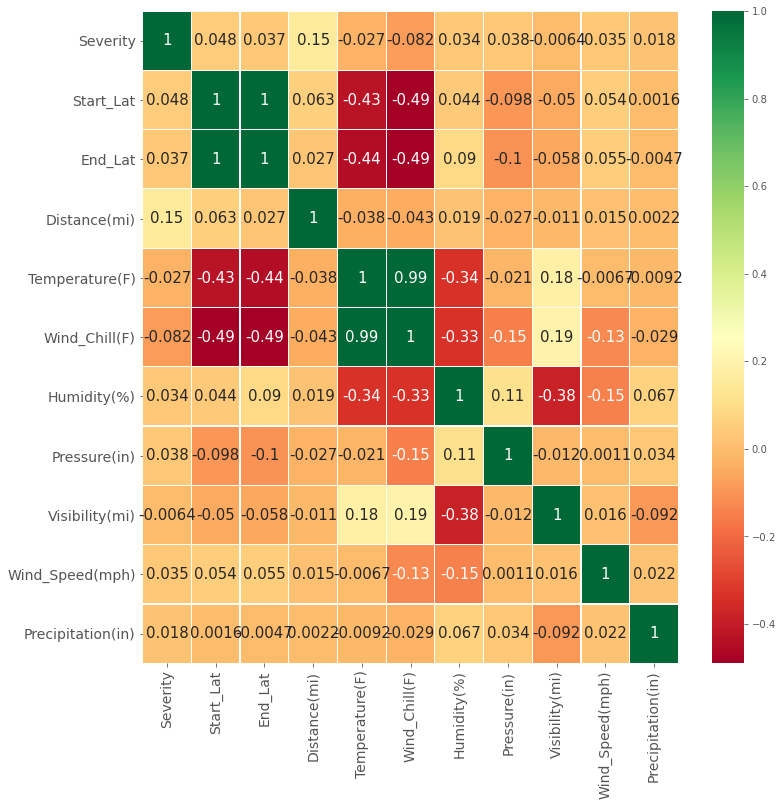

In [437]:
# Correlation
fig = sns.heatmap(
    df[['Severity', 'Start_Lat', 'End_Lat', 'Distance(mi)', 
        'Temperature(F)', 'Wind_Chill(F)','Humidity(%)', 'Pressure(in)', 
        'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']].corr(),
    annot = True, cmap = 'RdYlGn', linewidths = 0.2, annot_kws = {'size':15})
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

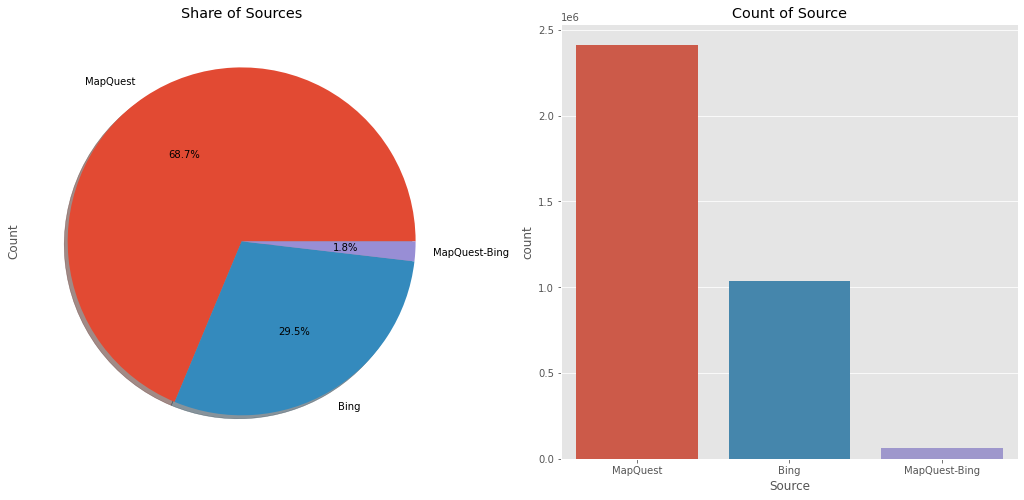

In [441]:
# Source of Data
f, ax = plt.subplots(1, 2, figsize=(18,8))
df['Source'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source', data = df, ax = ax[1], order = df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

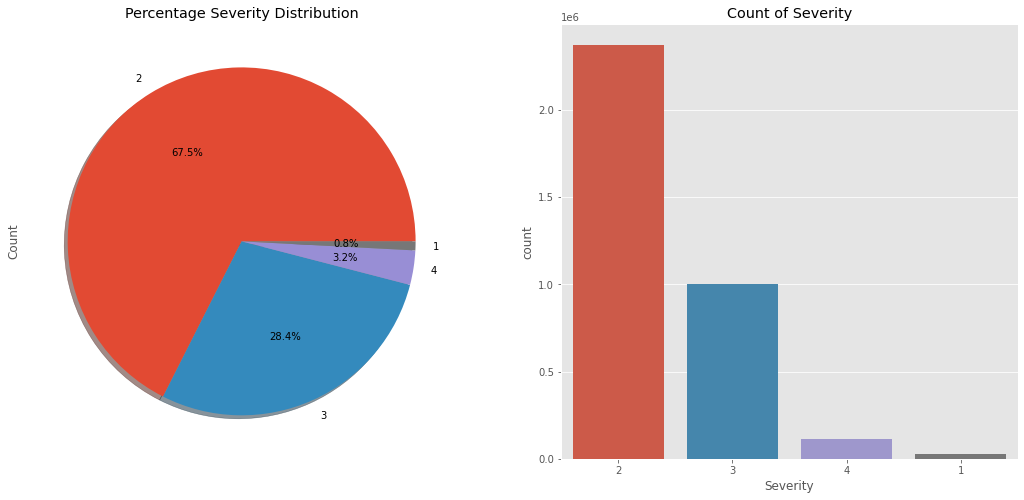

In [8]:
# Severity
f, ax = plt.subplots(1, 2, figsize=(18,8))
df['Severity'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity', data = df, ax = ax[1], order = df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

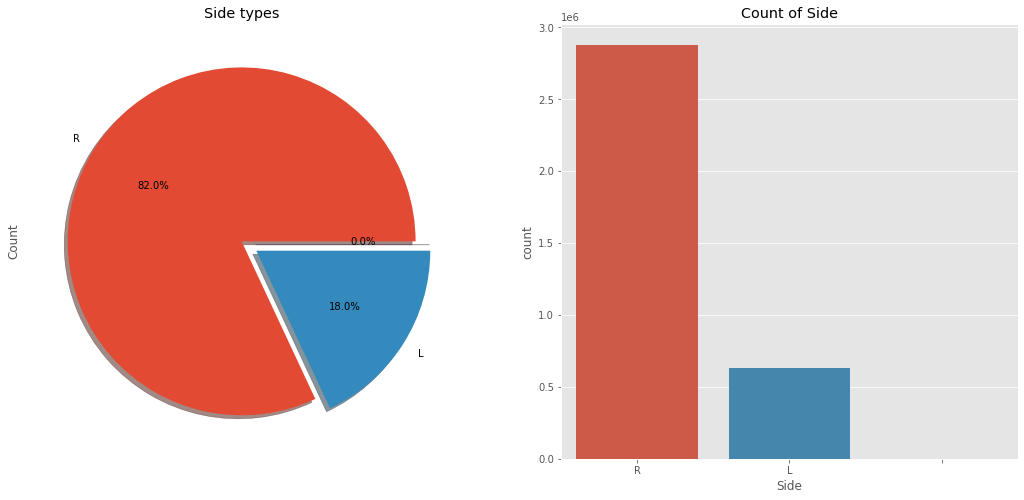

In [9]:
# Side: There are three things mentioned in side (Right Left and third one is a blank space)
f, ax = plt.subplots(1, 2, figsize=(18,8))
df['Side'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side', data = df, ax = ax[1], order = df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

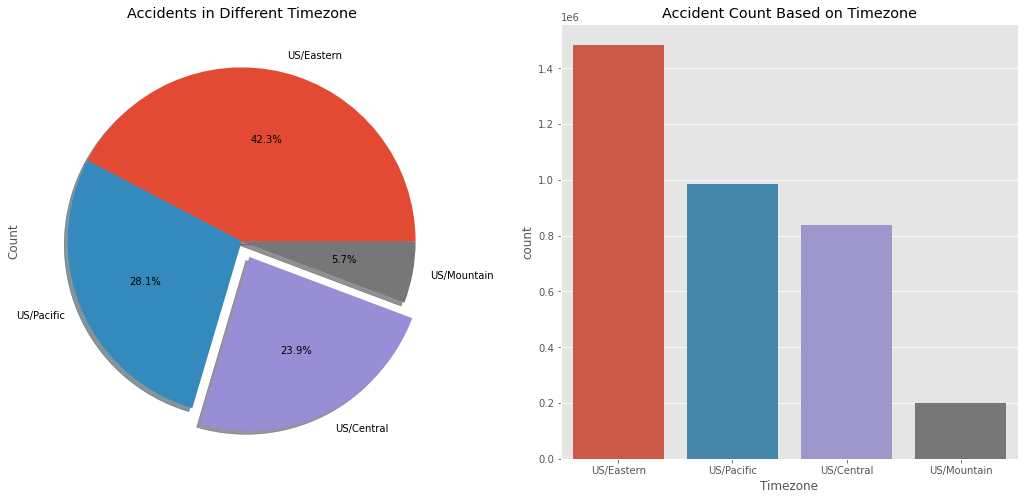

In [10]:
# USA has four time zones Pacific, Mountain, Central and Eastern as we move from West to the east of the country
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in Different Timezone')
ax[0].set_ylabel('Count')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accident Count Based on Timezone')
plt.show()

In [264]:
# Time taken to clear the traffice
df['Start_Time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df['End_Time'] = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
df['diff'] = (df['End_Time']-df['Start_Time'])

top 20 accident durations correspond to 81.8% of the data


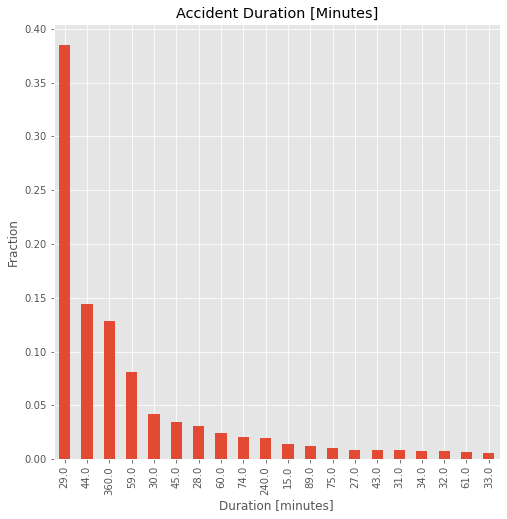

In [12]:
top20 = df['diff'].astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(df['diff'])))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

From the above curve we can see that most of the accidents take less than an hours time to get resolved. But more than 12% of the accidents are taking 360 minutes to resolve.

In [13]:
# create df for state accidents
import plotly.graph_objects as go
state_count_acc = pd.value_counts(df['State'])

fig = go.Figure(data = go.Choropleth(
    locations = state_count_acc.index,
    z = state_count_acc.values.astype(float),
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Count Accidents",
))

fig.update_layout(
    title_text = '2016 - 2020 US Traffic Accident Dataset by State',
    geo_scope='usa',
)
fig.show()

Text(0, 0.5, '')

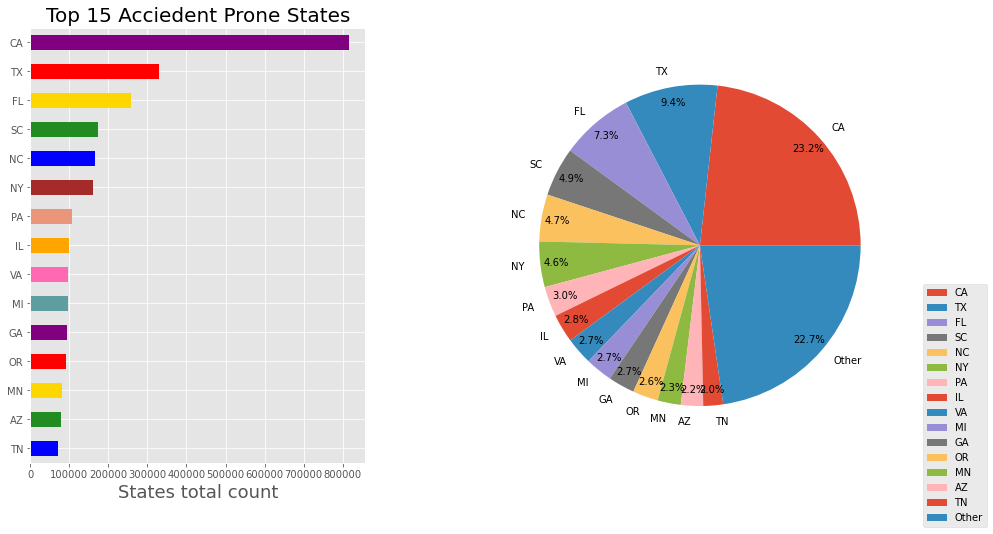

In [14]:
# Acceident in different states
fig,ax = plt.subplots(1, 2, figsize = (15, 8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending = False)[:15].sort_values().plot(kind = 'barh', ax = ax[0], color = clr)
ax[0].set_title("Top 15 Acciedent Prone States", size = 20)
ax[0].set_xlabel('States total count', size = 18)

count = df['State'].value_counts()
groups = list(df['State'].value_counts().index)[:15]
counts = list(count[:15])
counts.append(count.agg(sum) - count[:15].agg(sum))
groups.append('Other')
type_dict = pd.DataFrame({"group": groups, "counts": counts})
qx = type_dict.plot(kind = 'pie', y = 'counts', labels = groups, autopct = '%1.1f%%', 
                    pctdistance = 0.9, radius = 1.2, ax = ax[1])
plt.legend(loc = 0, bbox_to_anchor = (1.15, 0.4)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0)
plt.ioff()
plt.ylabel('')

We can see that more accidents are happening in state of California(CA), Texas(TX) and Florida(FL)

In [15]:
# Severity accidents
df_sever = df.sample(n=10000)

fig = go.Figure(
    data = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sever['Start_Lng'],
        lat = df_sever['Start_Lat'],
        text = df_sever['City'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.5,
            reversescale = False,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width = 1,
                color = 'rgba(102, 102, 102)'),
            colorscale = 'Reds',
            color = df_sever['Severity'],
            colorbar_title = "Severity"
        )
    )
)

fig.update_layout(
        title = 'Severity of accidents',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
fig.show()

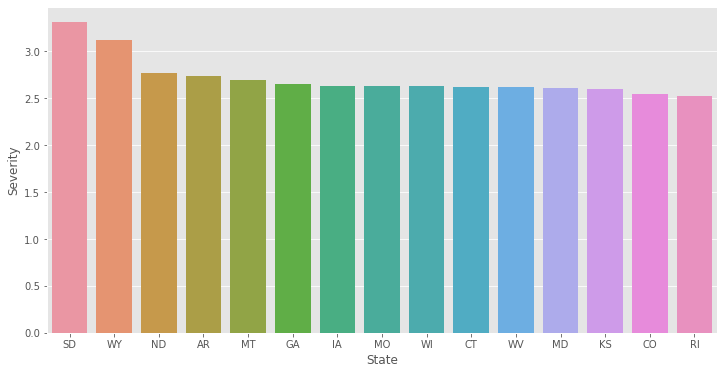

In [16]:
# Severity in different states
df_top_Severity_State=df.groupby('State').agg({'Severity':'mean'}).sort_values('Severity',ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(y = "Severity", x = "State", data = df_top_Severity_State.head(15))
plt.ioff()

Text(0, 0.5, '')

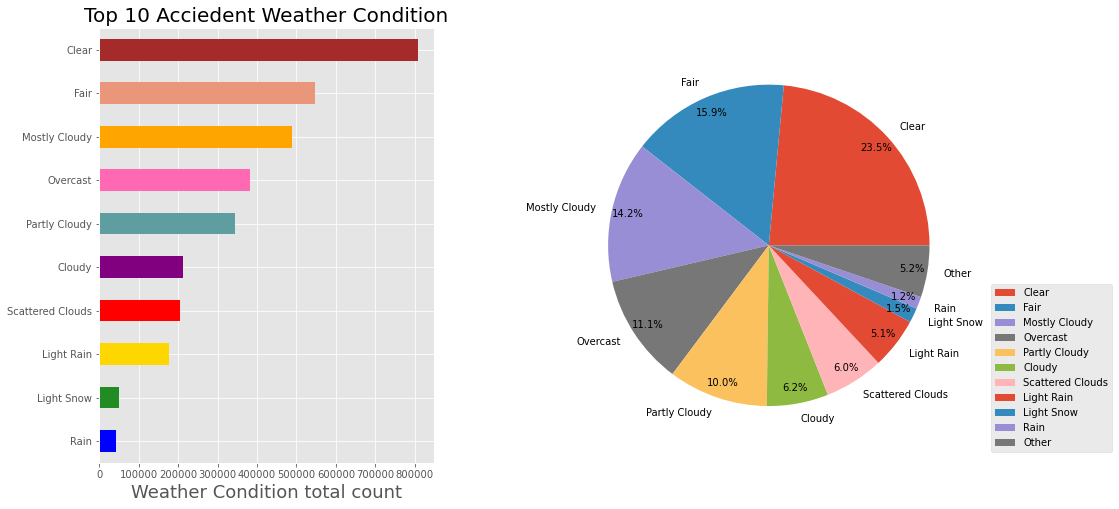

In [17]:
# Weather confition for the accidents
fig,ax = plt.subplots(1, 2, figsize = (15, 8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.Weather_Condition.value_counts().sort_values(ascending = False)[:10].sort_values().plot(
    kind = 'barh', ax = ax[0], color = clr)
ax[0].set_title("Top 10 Acciedent Weather Condition", size = 20)
ax[0].set_xlabel('Weather Condition total count', size = 18)

count = df['Weather_Condition'].value_counts()
groups = list(df['Weather_Condition'].value_counts().index)[:10]
counts = list(count[:10])
counts.append(count.agg(sum) - count[:10].agg(sum))
groups.append('Other')
type_dict = pd.DataFrame({"group": groups, "counts": counts})
qx = type_dict.plot(kind = 'pie', y = 'counts', labels = groups, autopct = '%1.1f%%', 
                    pctdistance = 0.9, radius = 1.2, ax = ax[1])
plt.legend(loc = 0, bbox_to_anchor = (1.15, 0.4)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0)
plt.ioff()
plt.ylabel('')

Most accidents occure when the weather is clear. Maybe people drive faster and inattention when the weather is clear, and more carefully when the weather is bad.

In [18]:
# Where are Accidents occuring
bool_cols = [col for col in df.columns if df[col].dtype == np.dtype('bool')] # find the bool type columns
booldf = df[bool_cols]
more_than_one = booldf[booldf.sum(axis = 1) > 1] # find combination with more than 1 fact
print('There are {} more than one fact metadata rows, which are {:.1f}% of the data'.format(
    len(more_than_one), 100*len(more_than_one)/len(df)
))

There are 284711 more than one fact metadata rows, which are 8.1% of the data


In [19]:
bools = booldf.sum(axis = 0)
bools

Amenity             42082
Bump                  606
Crossing           274526
Give_Way             9564
Junction           284449
No_Exit              4384
Railway             31175
Roundabout            184
Station             70321
Stop                51976
Traffic_Calming      1401
Traffic_Signal     623623
Turning_Loop            0
dtype: int64

Text(0.5, 1.0, 'Proximity to Traffic Object')

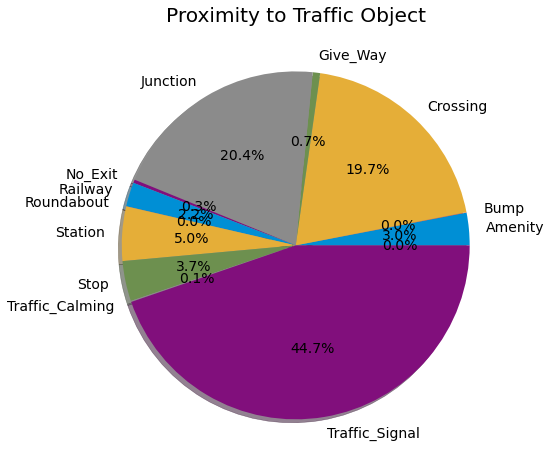

In [20]:
plt.figure(figsize=(9,8))
plt.style.use('fivethirtyeight')
bools.plot.pie(autopct='%1.1f%%', shadow = True)
plt.ylabel('')
plt.title('Proximity to Traffic Object')

We can see that more accidents are happening near traffic signal,junction, and crossings

In [21]:
# Extract year, month, day, hour and weekday
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.strftime('%a')

<AxesSubplot:xlabel='Year', ylabel='count'>

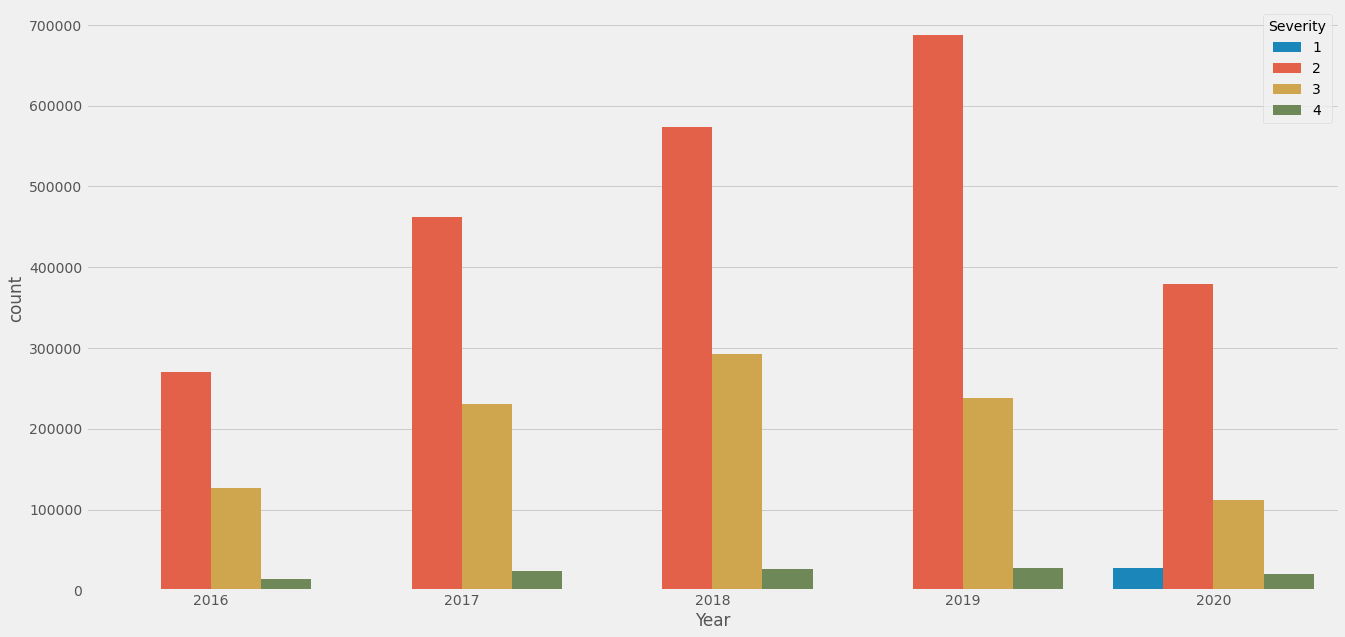

In [22]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Year", hue = "Severity", data = df)

<AxesSubplot:xlabel='Month', ylabel='count'>

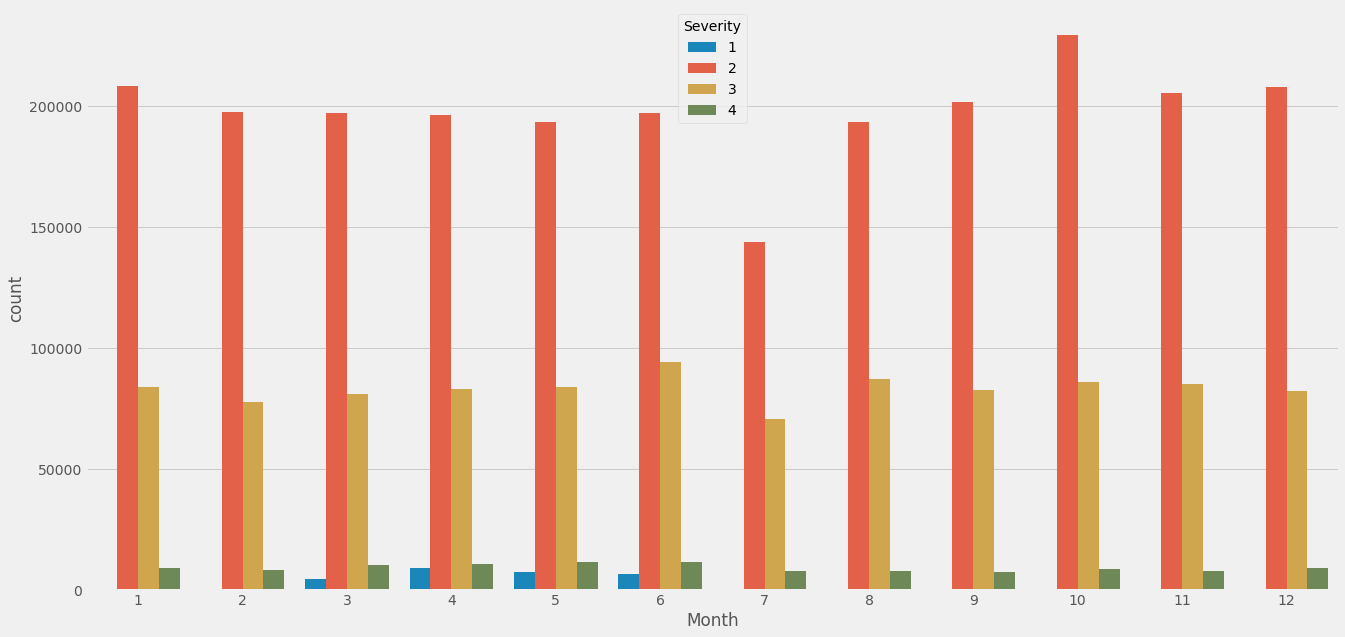

In [23]:
plt.figure(figsize = (20, 10))
sns.countplot(x = "Month", hue = "Severity", data = df)

<AxesSubplot:xlabel='Day', ylabel='count'>

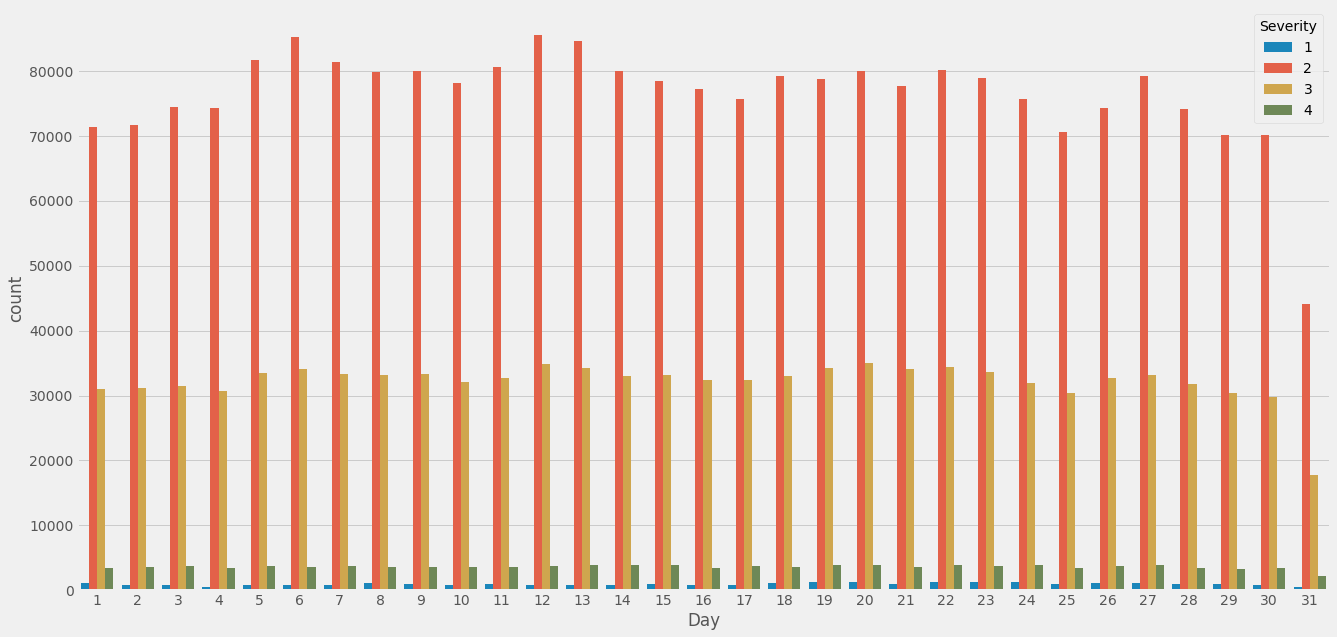

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Day", hue = "Severity", data = df)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

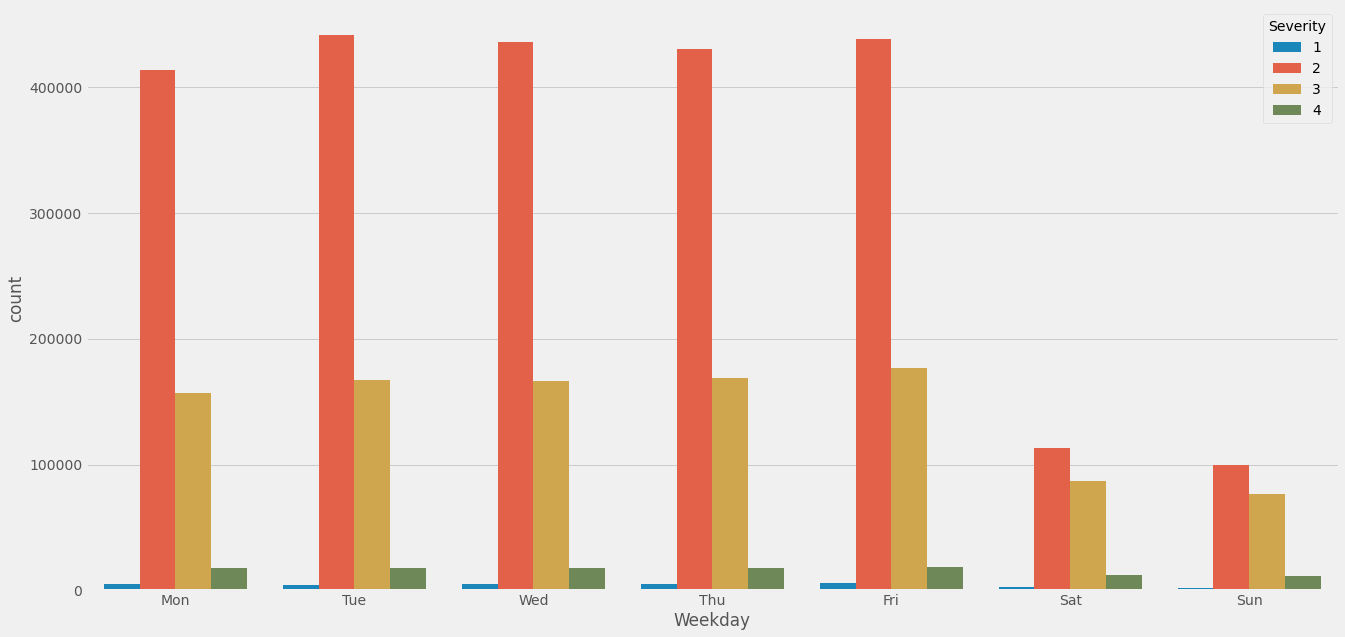

In [25]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Weekday", hue = "Severity", data = df)

<AxesSubplot:xlabel='Hour', ylabel='count'>

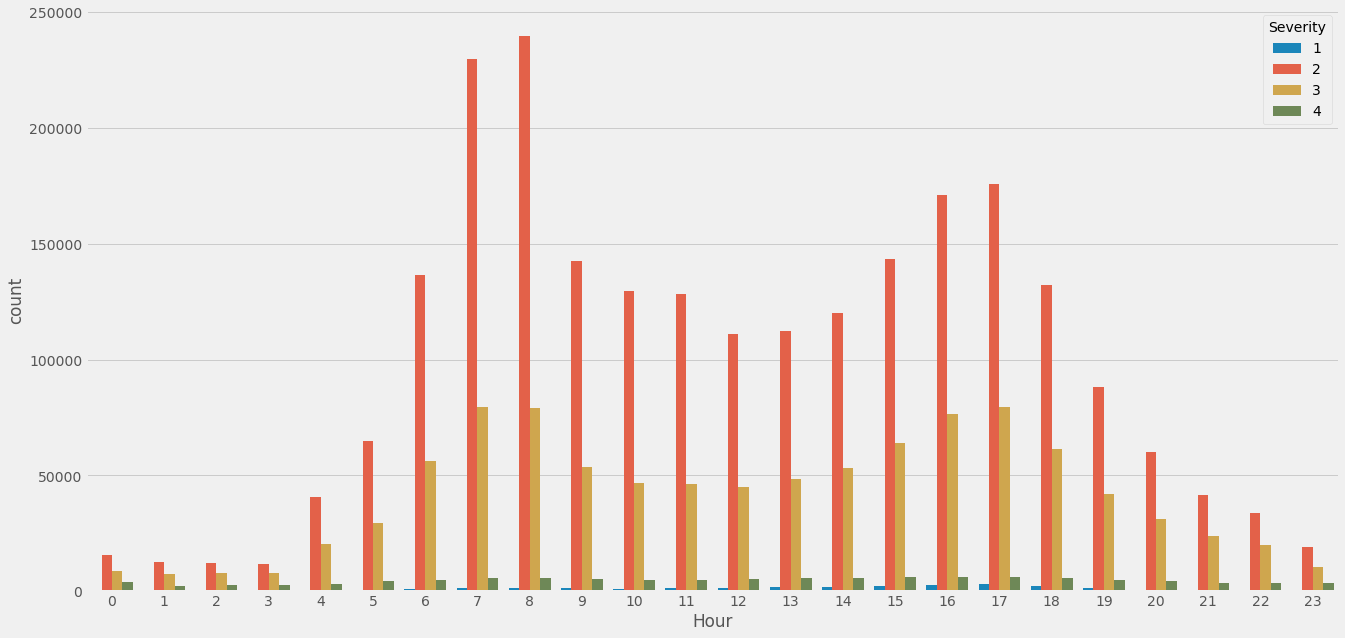

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "Hour", hue = "Severity", data = df)

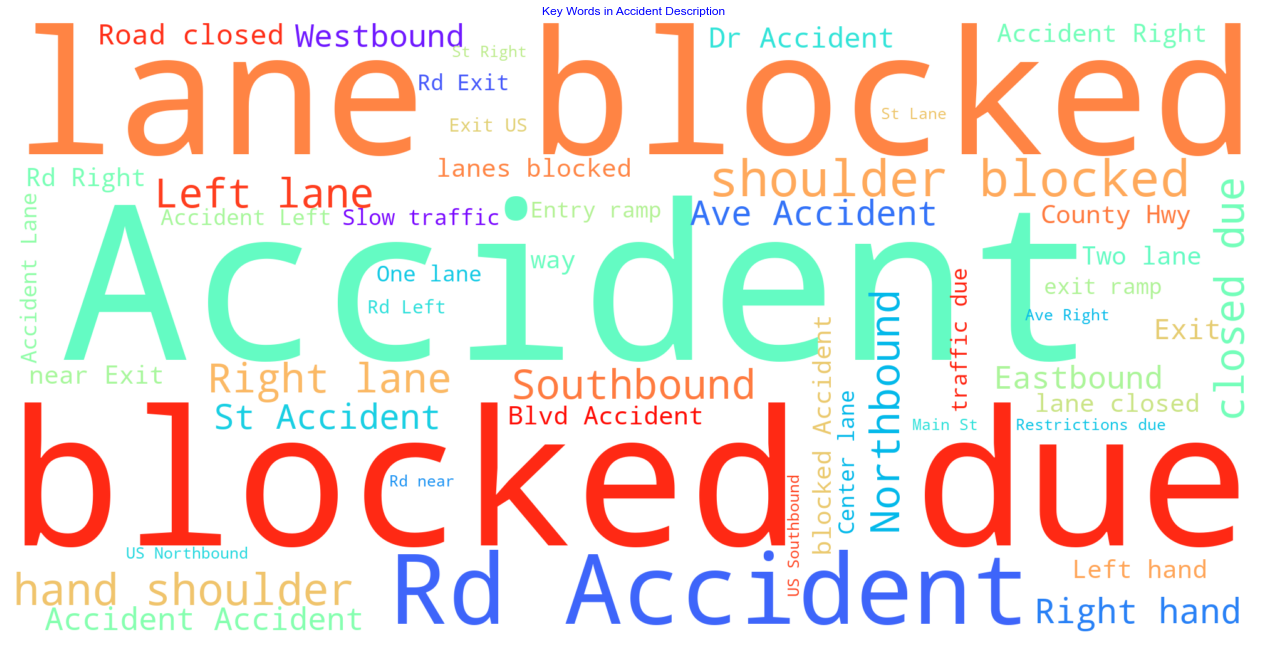

In [27]:
# Key Words in Description
from wordcloud import WordCloud
plt.style.use('seaborn')
wrds1 = df["Description"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale = 5, max_words = 50, colormap = "rainbow", 
                mode = "RGBA", background_color = "white").generate(" ".join(wrds1))
plt.figure(figsize = (20, 15))
plt.imshow(wc1,interpolation = "bilinear")
plt.axis("off")
plt.title("Key Words in Accident Description", color = 'b')
plt.show()

## Data Clearning

In [28]:
# copy the dataframe before start cleaning the data
df_tmp = df.copy()

#### Clean the outliers of the time_duration

In [29]:
# Check if there is any negative time_duration values
df_tmp.loc[df_tmp['diff']/np.timedelta64(1, 'm') <= 0]

# Drop the rows with above
df_tmp['diff'] = df_tmp['diff']/np.timedelta64(1, 'm')
df_tmp = df_tmp[df_tmp['diff'] > 0]

ID    Source    TMC  Severity          Start_Time  \
69719      A-69721  MapQuest  201.0         3 2016-11-06 01:38:13   
69720      A-69722  MapQuest  241.0         2 2016-11-06 01:38:45   
69721      A-69723  MapQuest  201.0         3 2016-11-06 01:35:47   
69722      A-69724  MapQuest  201.0         2 2016-11-06 01:32:24   
69723      A-69725  MapQuest  201.0         2 2016-11-06 01:33:05   
309387    A-309390  MapQuest  201.0         2 2016-11-06 01:51:04   
309388    A-309391  MapQuest  201.0         2 2016-11-06 01:51:49   
860988    A-861014  MapQuest  201.0         2 2019-11-03 01:25:16   
861024    A-861050  MapQuest  201.0         2 2019-11-03 01:47:49   
861041    A-861067  MapQuest  201.0         2 2019-11-03 01:34:54   
861475    A-861501  MapQuest  201.0         3 2019-11-03 01:20:44   
861494    A-861520  MapQuest  201.0         3 2019-11-03 01:44:47   
861495    A-861521  MapQuest  201.0         2 2019-11-03 01:43:50   
1497823  A-1497855  MapQuest  201.0         3 2018-11-04 01:30:41   
1497824  A-1497856  MapQuest  201.0         3 2018-11-04 01:40:28   
2234574  A-2234614  MapQuest  201.0         2 2017-11-05 01:56:55   
2234659  A-2234699  MapQuest  241.0         3 2017-11-05 01:32:24   
2234660  A-2234700  MapQuest  201.0         2 2017-11-05 01:55:55   
3104499  A-3104659      Bing    NaN         2 2019-11-03 01:57:00   
3104975  A-3105135      Bing    NaN         2 2019-11-03 01:13:00   
3104978  A-3105138      Bing    NaN         2 2019-11-03 01:22:00   
3232740  A-3232900      Bing    NaN         2 2018-11-04 01:51:53   

                   End_Time  Start_Lat   Start_Lng    End_Lat     End_Lng  \
69719   2016-11-06 01:37:57  34.032963 -118.435738        NaN         NaN   
69720   2016-11-06 01:38:23  34.053040 -118.228264        NaN         NaN   
69721   2016-11-06 01:35:31  33.804443 -118.207527        NaN         NaN   
69722   2016-11-06 01:31:50  34.134960 -117.597748        NaN         NaN   
69723   2016-11-06 01:32:33  34.070320 -117.208679        NaN         NaN   
309387  2016-11-06 01:20:49  47.608002 -122.296280        NaN         NaN   
309388  2016-11-06 01:21:35  47.530354 -122.270004        NaN         NaN   
860988  2019-11-03 01:12:56  42.793083  -78.818367        NaN         NaN   
861024  2019-11-03 01:17:08  43.091412  -75.747284        NaN         NaN   
861041  2019-11-03 01:34:31  41.043110  -73.835861        NaN         NaN   
861475  2019-11-03 01:06:33  45.635433 -122.663467        NaN         NaN   
861494  2019-11-03 01:44:26  37.561687 -122.036362        NaN         NaN   
861495  2019-11-03 01:13:31  37.730671 -121.747063        NaN         NaN   
1497823 2018-11-04 01:00:17  34.172119 -118.467529        NaN         NaN   
1497824 2018-11-04 01:09:39  34.067585 -117.201378        NaN         NaN   
2234574 2017-11-05 01:26:32  47.121880 -122.434883        NaN         NaN   
2234659 2017-11-05 01:02:02  34.045719 -117.310364        NaN         NaN   
2234660 2017-11-05 01:25:05  33.923199 -117.857597        NaN         NaN   
3104499 2019-11-03 01:22:55  43.024010  -71.195290  43.024880  -71.190330   
3104975 2019-11-03 01:05:47  34.041208 -118.064316  34.041208 -118.064316   
3104978 2019-11-03 01:14:47  36.326633 -119.279029  36.326633 -119.279029   
3232740 2018-11-04 01:21:22  40.705504 -111.888270  40.703211 -111.888260   

         Distance(mi)                                        Description  \
69719           0.010   Accident on I-10 Eastbound at Exits 3A 3B I-405.   
69720           0.010  Lane blocked due to accident on US-101 Northbo...   
69721           0.010  Accident on I-710 Northbound at Exits 3A 3B Wi...   
69722           1.230  Hov lane blocked due to accident on CA-210 Eas...   
69723           0.010             Accident on Lugonia Ave at Alabama St.   
309387          0.010  Accident on Martin Luther King Jr Way at Cherr...   
309388          0.010            Accident on Rainier Ave at Elmgrove St.   
860988          6.210  Accident on I-90 Eastboun

In [31]:
# review the status of missing values for each column
num = df_tmp.isna().sum()
num

ID                             0
Source                         0
TMC                      1034795
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478800
End_Lng                  2478800
Distance(mi)                   0
Description                    1
Number                   2262850
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868237
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454602
Precipitat

In [32]:
# replace na in Precipitation(in) with 0
df_tmp['Precipitation(in)'] = df_tmp['Precipitation(in)'].fillna(0)

#### Clean the outliers in 'Distance(mi)', 'Temperature(F)', 'Pressure(in)', 'Visibility(mi)', and 'Wind_Speed(mph)'

In [33]:
# check how much outliers these columns has by 3 sigma rules
outlier_list = ['Distance(mi)', 'Temperature(F)', 'Pressure(in)', 
                'Visibility(mi)', 'Wind_Speed(mph)', 
                'Precipitation(in)']

for item in outlier_list:

    df_tmp[item + '_zscore'] = (df_tmp[item] - df_tmp[item].mean())/df_tmp[item].std()
    z_abnormal = abs(df_tmp[item + '_zscore']) > 3
    print(item + ' has ' + str(z_abnormal.sum()) + ' outliers')

Distance(mi) has 37756 outliers
Temperature(F) has 13420 outliers
Pressure(in) has 84587 outliers
Visibility(mi) has 32400 outliers
Wind_Speed(mph) has 21468 outliers
Precipitation(in) has 7417 outliers


In [34]:
# drop the outliers
for item in outlier_list:
    
    median = df_tmp[item].median()
    std = df_tmp[item].std()
    df_tmp = df_tmp[(df_tmp[item] - median).abs() <= std * 3]

#### Deal with missing values


In [36]:
# Set the list of features to include in Machine Learning
feature_lst=['Severity','Start_Time','Start_Lng','Start_Lat','Distance(mi)',
             'Side','City','County','State','Timezone','Temperature(F)',
             'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction',
             'Wind_Speed(mph)','Precipitation(in)','Weather_Condition',
             'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
             'Railway','Roundabout','Station','Stop','Traffic_Calming',
             'Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday']

In [37]:
# Select the dataset to include only the selected features
df_sel = df_tmp[feature_lst].copy()

In [38]:
# drop the rows with missing values
df_sel.dropna(subset = df_sel.columns[df_sel.isnull().mean()!=0], how = 'any', axis = 0, inplace = True)

In [39]:
# convert all bool columns to int type data (0,1)
df_sel[bool_cols] = df_sel[bool_cols].astype(int)

## Select the sample data for analysing (state of interest, and the City of interest)
Due to the limitation of personal laptop, the whole US dataset is too big to handle

In [201]:
# Select the state of South Carolina, which has the most accident records
df_state = df_sel.loc[df_sel.State == 'CA'].copy()
df_state.drop('State', axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650415 entries, 728 to 3513616
Data columns (total 33 columns):
Severity             650415 non-null int64
Start_Time           650415 non-null datetime64[ns]
Start_Lng            650415 non-null float64
Start_Lat            650415 non-null float64
Distance(mi)         650415 non-null float64
Side                 650415 non-null object
City                 650415 non-null object
County               650415 non-null object
Timezone             650415 non-null object
Temperature(F)       650415 non-null float64
Humidity(%)          650415 non-null float64
Pressure(in)         650415 non-null float64
Visibility(mi)       650415 non-null float64
Wind_Direction       650415 non-null object
Wind_Speed(mph)      650415 non-null float64
Precipitation(in)    650415 non-null float64
Weather_Condition    650415 non-null object
Amenity              650415 non-null int32
Bump                 650415 non-null int32
Crossing             650415 non-null

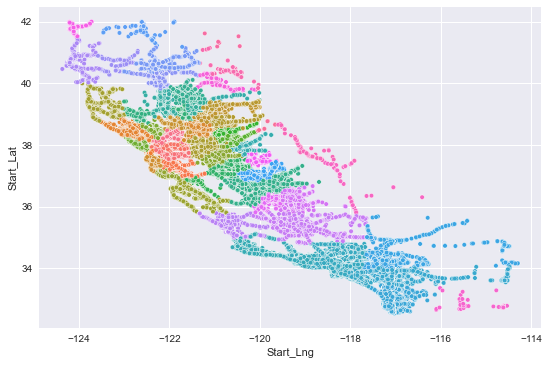

In [42]:
# Map of accidents, color code by county
sns.scatterplot(x = 'Start_Lng', y = 'Start_Lat', data = df_state, hue = 'County', legend = False, s = 20)
plt.show()

In [202]:
# find the city with most accident cases
city = df_state.City.value_counts().sort_values(ascending = False)[:10]
city

Los Angeles       56120
Sacramento        28805
San Diego         22663
San Jose          17454
Oakland           12811
Riverside         10925
Long Beach         9953
San Francisco      8810
Anaheim            8496
San Bernardino     7701
Name: City, dtype: int64

In [44]:
# Select the city with most cases for modeling
df_city = df_state.loc[df_state.City == 'Los Angeles'].copy()
df_city.drop('City', axis = 1, inplace = True)

In [45]:
df_city['Severity'].value_counts(normalize = True) * 100

2    66.760513
3    32.435852
4     0.789380
1     0.014255
Name: Severity, dtype: float64

Which means our prediction accuracy should at least above the percentage of the highest counted one. Because if a model predicts all the case's to that severity, it will get the accuracy same as that percentage.

#### Deal with categorical data: pd.get_dummies()

In [46]:
# Generate dummies for categorical data
df_city.drop('Start_Time', axis = 1, inplace = True)
df_city_dummy = pd.get_dummies(df_city, drop_first = True)

## Predict the accident severity with various supervised machine learning algorithms

#### Import the machine learning libraries

In [18]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#### Data preparation: train_test_split

In [48]:
# Set the target for the prediction
target='Severity'

# set X and y
y = df_city_dummy[target]
X = df_city_dummy.drop(target, axis = 1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

In [49]:
# List of classification algorithms
algo_lst = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Trees', 'Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_lst = []

#### Algorithm A. Logistic regression

In [50]:
# Logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.704.


#### Algorithm B. The K-Nearest Neighbors (KNN) algorithm

In [51]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 4)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

print('[K-Nearest Neighbors (KNN)] knn.score: {:.3f}.'.format(knn.score(X_test, y_test)))
print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.3f}.'.format(acc))

[K-Nearest Neighbors (KNN)] knn.score: 0.669.
[K-Nearest Neighbors (KNN)] accuracy_score: 0.669.


Optmize the number of neighors: plot the accuracy versus number of neighbors

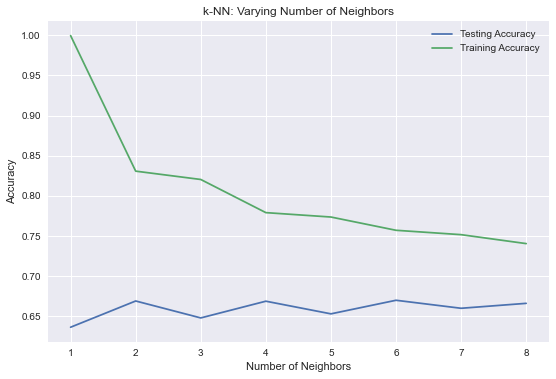

In [52]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, n_neighbor in enumerate(neighbors):
    
    # Setup a k-NN Classifier with n_neighbor
    knn = KNeighborsClassifier(n_neighbors = n_neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Algorithm C. Decision Tree

In [53]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy', random_state = 1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.3f}.'.format(accuracy_entropy))

# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth = 10, criterion = 'gini', random_state = 1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc = accuracy_gini
accuracy_lst.append(acc)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

[Decision Tree -- entropy] accuracy_score: 0.818.
[Decision Tree -- gini] accuracy_score: 0.809.


#### Algorithm D. Random Forest

In [54]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(acc))

[Randon forest algorithm] accuracy_score: 0.809.


Find the most important features

No handles with labels found to put in legend.


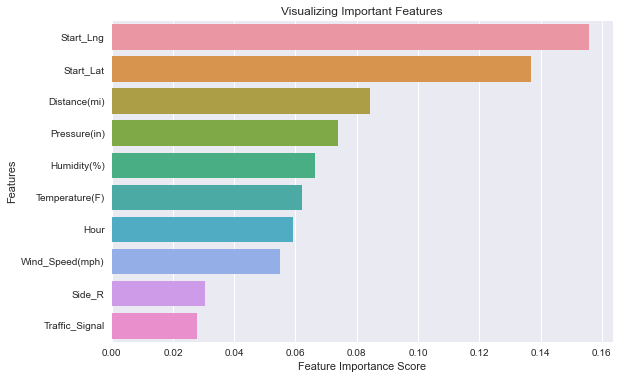

In [55]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False)

# Creating a bar plot, displaying only the top k features
k = 10
sns.barplot(x = feature_imp[:10], y = feature_imp.index[:k])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [56]:
# List top k important features
k = 20
feature_imp.sort_values(ascending = False)[:k]

Start_Lng                  0.155800
Start_Lat                  0.136912
Distance(mi)               0.084278
Pressure(in)               0.073940
Humidity(%)                0.066338
Temperature(F)             0.061989
Hour                       0.059239
Wind_Speed(mph)            0.055023
Side_R                     0.030569
Traffic_Signal             0.027936
Weather_Condition_Fair     0.022207
Visibility(mi)             0.017734
Weather_Condition_Clear    0.016928
Junction                   0.012951
Sunrise_Sunset_Night       0.011065
Weekday_Sat                0.009557
Weekday_Wed                0.008803
Weekday_Sun                0.008688
Weekday_Tue                0.008631
Weekday_Thu                0.008388
dtype: float64

In [57]:
# Create a selector object that will use the random forest classifier to identify features which importance > 0.04
sfm = SelectFromModel(clf, threshold = 0.04)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels = X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices = True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Wind_Speed(mph)
Hour


In [58]:
# Transform the data to create a new dataset containing only the most important features
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators = 500, random_state = 0, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('[Randon forest algorithm -- Full feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

# Get the accuracy score
acc = accuracy_score(y_test, y_important_pred)

# Append to the accuracy list
accuracy_lst.append(acc)

[Randon forest algorithm -- Full feature] accuracy_score: 0.832.
[Randon forest algorithm -- Limited feature] accuracy_score: 0.844.


#### Accuracy Score VS. Algorithm

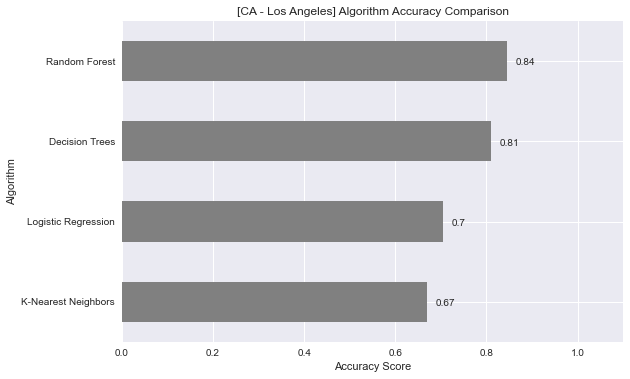

In [60]:
# Generate a list of ticks for y-axis
y_ticks = np.arange(len(algo_lst))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc = pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns = ['Algorithm', 'Accuracy_Score']).sort_values(by = ['Accuracy_Score'], ascending = True)

# Make a plot
ax = df_acc.plot.barh('Algorithm', 'Accuracy_Score', align = 'center', legend = False, color = '0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() + 0.02, i.get_y() + 0.2, str(round(i.get_width(), 2)), fontsize = 10)

# Set the limit, lables, ticks and title
plt.xlim(0, 1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation = 0)
plt.title('[CA - Los Angeles] Algorithm Accuracy Comparison')
plt.show()

## Time Series Forecasting For Road Accidents in one specific State

#### Auto Regressive Integrated Moving Average (ARIMA) model

In [ ]:
# save the cleaned dataframe to a csv file
# df_sel.to_csv('C:/Users/AS/Downloads/data/US_Accidents_forecast.csv', index = False, index_label = None)

In [2]:
import datetime
from pylab import rcParams
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [3]:
# Import the cleaned dataset
df_forecast = pd.read_csv('C:/Users/AS/Downloads/data/US_Accidents_forecast.csv')

In [4]:
# Set the list of features to include in Machine Learning
feature_lst_2=['Start_Time','Severity','Start_Lng','Start_Lat','Distance(mi)',
               'Side','State','Temperature(F)','Humidity(%)','Pressure(in)',
               'Visibility(mi)','Wind_Speed(mph)','Weather_Condition',
               'Traffic_Signal','Hour','Weekday']

In [65]:
# Select the dataset to include only the selected features
df_forecast = df_forecast[feature_lst_2].copy()
df_forecast['Count'] = 1

In [66]:
df_forecast.Timestamp = pd.to_datetime(df_forecast.Start_Time, format='%Y-%m-%d %H:%M:%S')

In [67]:
df_forecast['Start_Time_date'] = pd.DatetimeIndex(df_forecast.Timestamp).date

In [424]:
# Check out the Data for a specific State
df_fc_spe = df_forecast.loc[df_forecast.State == 'CA'].copy()
df_fc_spe.head()

Start_Time  Severity   Start_Lng  Start_Lat  Distance(mi)  \
24179    2016-03-22 17:44:13         2 -121.364571  38.713371         0.010   
24187    2016-03-22 23:57:48         3 -122.065567  37.980061         0.010   
1963359  2016-03-22 20:07:32         3 -122.307987  37.881943         0.276   
24177    2016-03-22 21:44:11         2 -121.415352  38.608391         0.010   
24180    2016-03-22 21:05:57         3 -121.273888  38.739998         0.010   

        Side State  Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
24179      L    CA            60.8         42.0         30.21             9.0   
24187      R    CA            52.0         71.0         30.23            10.0   
1963359    R    CA            57.0         64.0         30.24            10.0   
24177      L    CA            51.8         67.0         30.26            10.0   
24180      R    CA            53.6         58.0         30.25            10.0   

         Wind_Speed(mph) Weather_Condition  Traffic_Signal  Hour Weekday  \
24179                6.9             Clear               1    17     Tue   
24187                4.6             Clear               0    23     Tue   
1963359              8.1     Partly Cloudy               0    20     Tue   
24177                3.5             Clear               0    21     Tue   
24180                4.6             Clear               0    21     Tue   

         Count Start_Time_date  
24179        1      2016-03-22  
24187        1      2016-03-22  
1963359      1      2016-03-22  
24177        1      2016-03-22  
24180        1      2016-03-22

In [425]:
# Set the Date for index
df_fc_spe['Start_Time_date'] = pd.to_datetime(df_fc_spe.Start_Time_date, format='%Y-%m-%d')
acc_spec = df_fc_spe.set_index('Start_Time_date')
acc_spec.index

DatetimeIndex(['2016-03-22', '2016-03-22', '2016-03-22', '2016-03-22',
               '2016-03-22', '2016-03-22', '2016-03-22', '2016-03-22',
               '2016-03-22', '2016-03-22',
               ...
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30', '2020-06-30', '2020-06-30',
               '2020-06-30', '2020-06-30'],
              dtype='datetime64[ns]', name='Start_Time_date', length=650415, freq=None)

In [426]:
y_spec = acc_spec['Count'].resample('M').sum()

In [429]:
rn_spec = np.where(y_spec.index == '2019-12-31')
n = int(rn_spec[0]) + 1

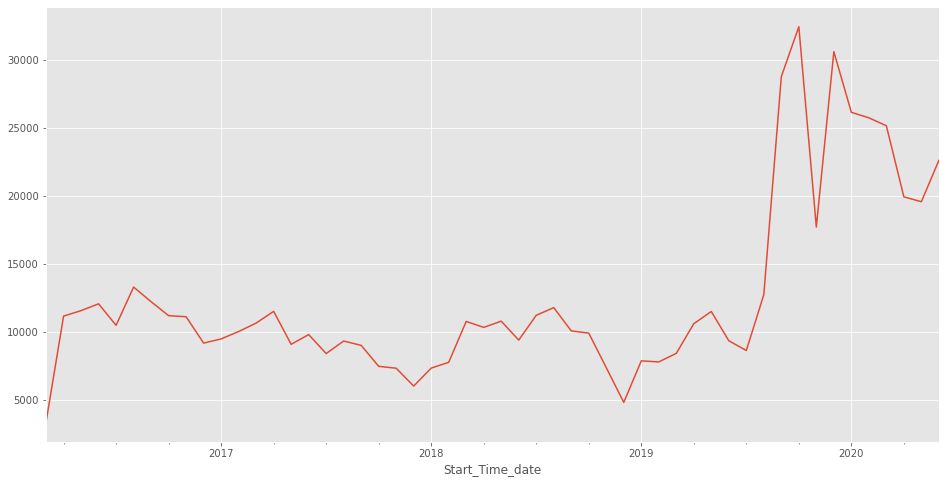

In [428]:
y_spec.plot(figsize=(16, 8))
plt.show()

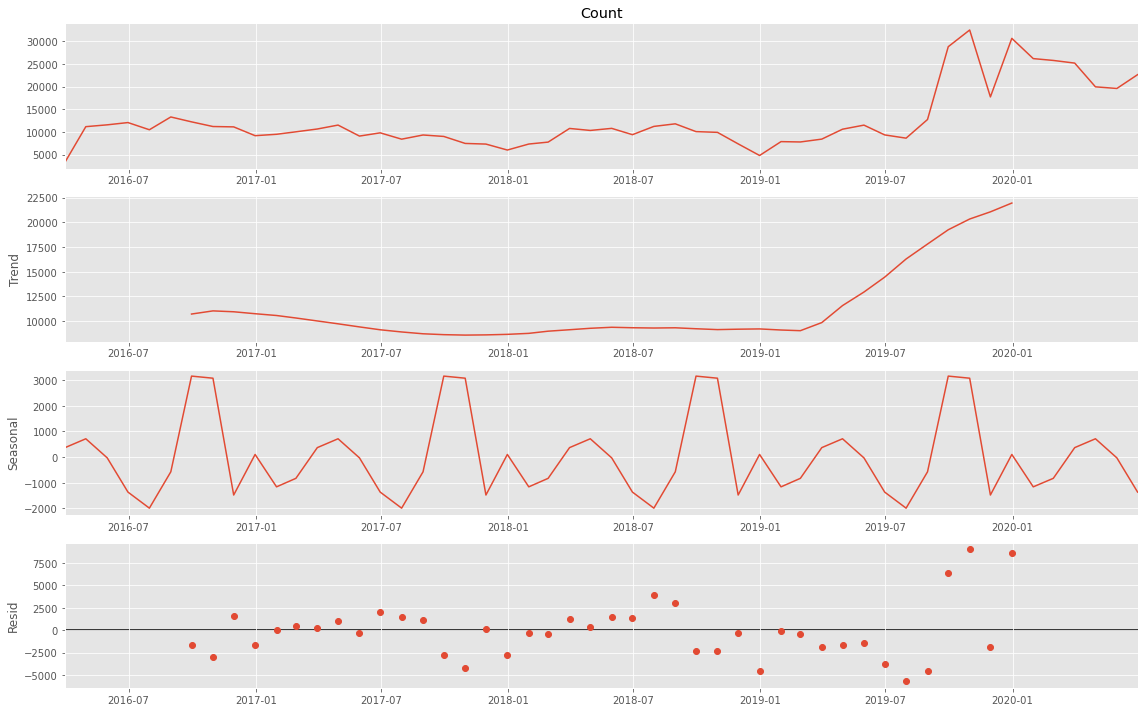

In [430]:
# visualise the data using time-series decomposition which decompose time series into three distinct components: 
# trend, seasonality, and noise.
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y_spec, model='additive')
fig = decomposition.plot()
plt.show()

In [431]:
# Parameter combinations for seasonal ARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [377]:
# use a “grid search” to find the optimal set of parameters that yields the best performance for ARIMA model
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_spec[:n],
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:979.4273732610349
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1365.5727695260152
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:682.9871031272089
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:444.90524281681127
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:704.7926489651738
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1367.6904076447106
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:465.68332435176467
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:441.4333327812981
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:932.3783544649402
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3827.6458355236273
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:652.407333493177
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:417.5398967809095
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:689.5481512815007
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3539.145187675308
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:457.1584276451849
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:419.5377203858947
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:860.0212165535962
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1270.5687945583882
ARIMA

CA: ARIMA(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC 389.08.

In [432]:
# Fitting the ARIMA Model
mod = sm.tsa.statespace.SARIMAX(y_spec[:n],
                                order = (0,1,1),
                                seasonal_order = (0,1,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)
results_spec = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8750      0.101      8.662      0.000       0.677       1.073
ma.L1         -1.0000    887.138     -0.001      0.999   -1739.759    1737.759
ar.S.L12      -0.5273      0.229     -2.304      0.021      -0.976      -0.079
ma.S.L12       0.9993    887.211      0.001      0.999   -1737.901    1739.900
sigma2      1265.4366      0.385   3282.995      0.000    1264.681    1266.192


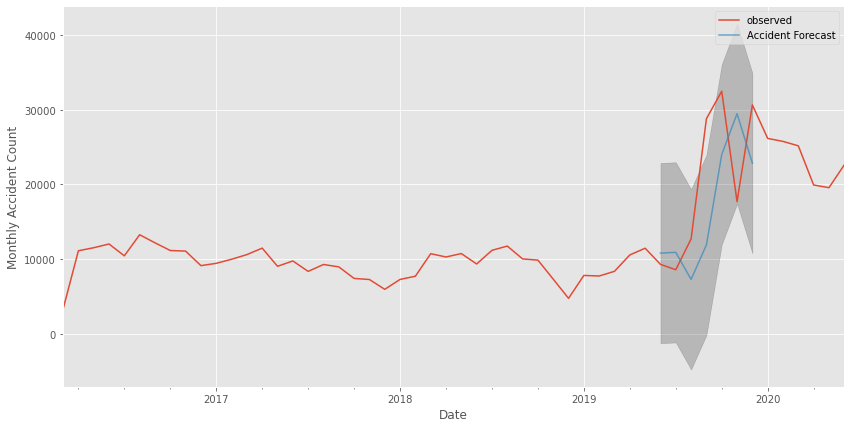

In [434]:
pred_spec = results_spec.get_prediction(start = pd.to_datetime('2019-06-30'), dynamic = False)
pred_ci_spec = pred_spec.conf_int()
ax = y_spec['2016':].plot(label = 'observed')
pred_spec.predicted_mean.plot(ax = ax, 
                              label = 'Accident Forecast', 
                              alpha = .7, 
                              figsize = (14, 7))
ax.fill_between(pred_ci_spec.index,
                pred_ci_spec.iloc[:, 0],
                pred_ci_spec.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Accident Count')
plt.legend()
plt.show()

In [380]:
# Use mean squared error (MSE) to check the accuracy of this model
y_forecasted = pred.predicted_mean
y_truth = y_spec['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of the forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of the forecasts is 636637.42


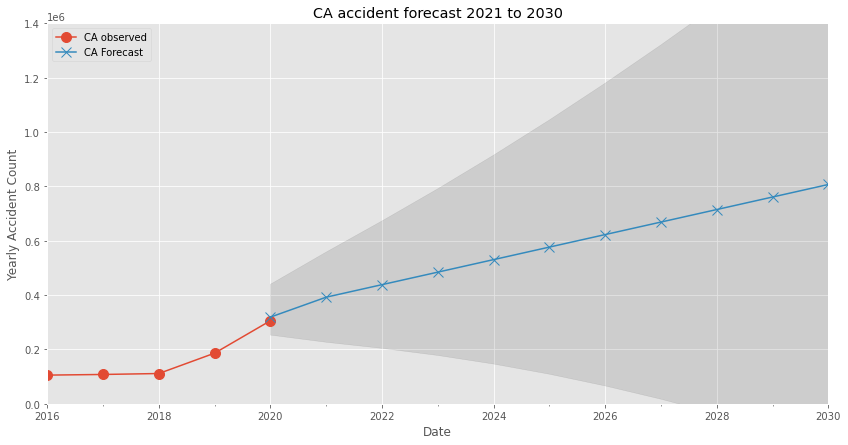

In [389]:
# Visualising the number of road accident in USA in next years
pred_uc = results.get_forecast(steps = 132)
pred_ci = pred_uc.conf_int(alpha = 0.5).resample('Y').sum()
pred_y_s = pd.concat([y_spec[-6:], pred_uc.predicted_mean[6:]]).round()
obse_y_s = pd.concat([y_spec, pred_uc.predicted_mean[:6]]).round()
ax = obse_y_s.resample('Y').sum().plot(label = 'CA observed', figsize = (14, 7), marker='o', markersize = 10)
pred_y_s.resample('Y').sum().plot(ax = ax, label = 'CA Forecast', marker='x', markersize = 10)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.10)
ax.set_xlabel('Date')
ax.set_ylabel('Yearly Accident Count')
plt.title('CA accident forecast 2021 to 2030')
plt.legend(loc = 2)
plt.ylim(ymin = 0, ymax = 1400000)
plt.show()

## Time Series Forecasting For Road Accidents in US and each state

In [403]:
# forecasting for the US
df_forecast['Count']=1
df_forecast['Start_Time_date'] = pd.to_datetime(df_forecast.Start_Time_date, format='%Y-%m-%d')

In [404]:
# Set the Date for index
df_forecast.sort_values('Start_Time_date', inplace = True)
accident_US = df_forecast.set_index('Start_Time_date')

In [405]:
y_us = accident_US['Count'].resample('M').sum()

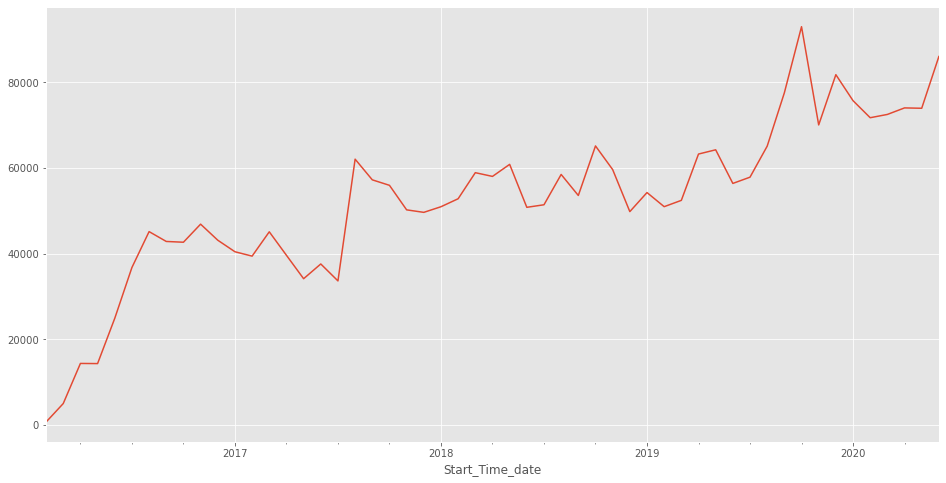

In [406]:
y_us.plot(figsize=(16, 8))
plt.show()

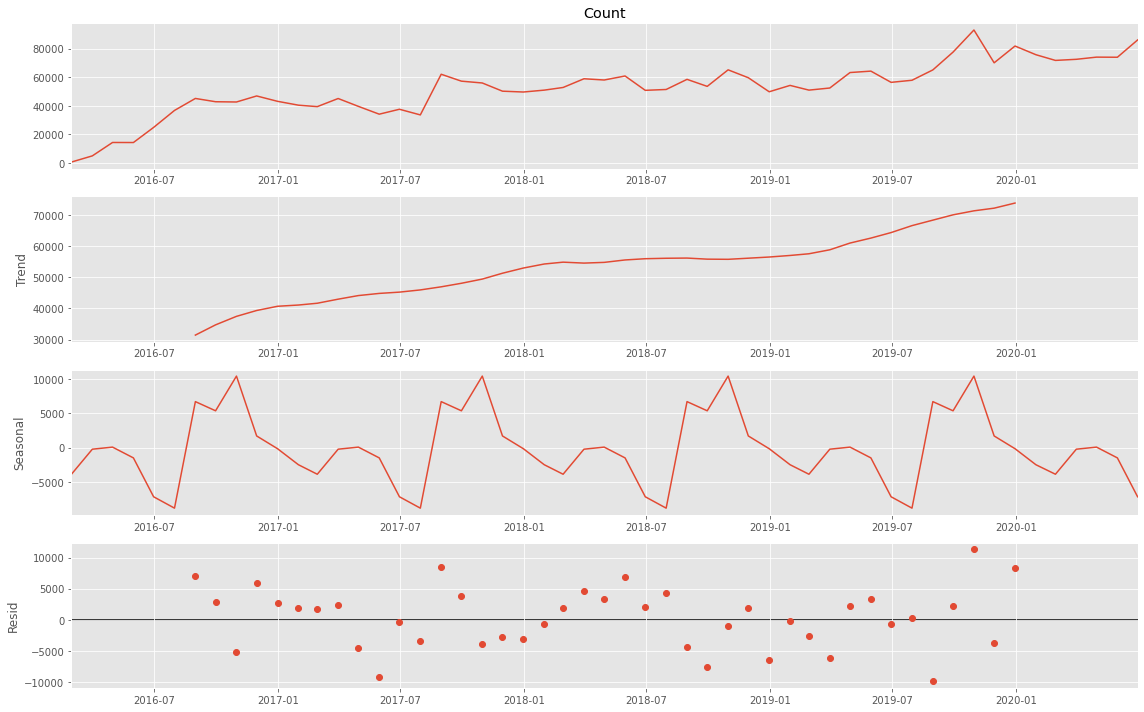

In [407]:
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y_us, model='additive')
fig = decomposition.plot()
plt.show()

In [409]:
# use a “grid search” to find the optimal set of parameters that yields the best performance for ARIMA model
results_us = []
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_us[:47],
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = True,
                                            enforce_invertibility = True)
            results_ite = mod.fit()                
        except:
            continue
        res_aic = results_ite.aic
        if results_ite.aic <= res_aic:
            res_aic = results_ite.aic
            results_us=([param, param_seasonal, results_ite.aic])

mod = sm.tsa.statespace.SARIMAX(y_us[:47],
                                order = results_aic[0],
                                seasonal_order = results_aic[1],
                                enforce_stationarity = True,
                                enforce_invertibility = True)
results_us = mod.fit()
print(results_us.summary().tables[1])

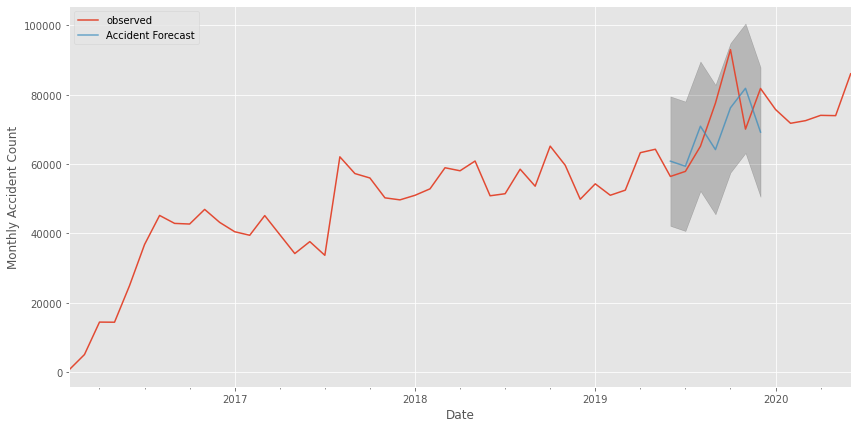

In [416]:
pred_us = results_us.get_prediction(start = pd.to_datetime('2019-06-30'), dynamic = False)
pred_ci_us = pred_us.conf_int()
ax = y_us['2016':].plot(label = 'observed')
pred_us.predicted_mean.plot(ax = ax, 
                            label = 'Accident Forecast', 
                            alpha = .7, 
                            figsize = (14, 7))
ax.fill_between(pred_ci_us.index,
                pred_ci_us.iloc[:, 0],
                pred_ci_us.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Accident Count')
plt.legend(loc = 2)
plt.show()

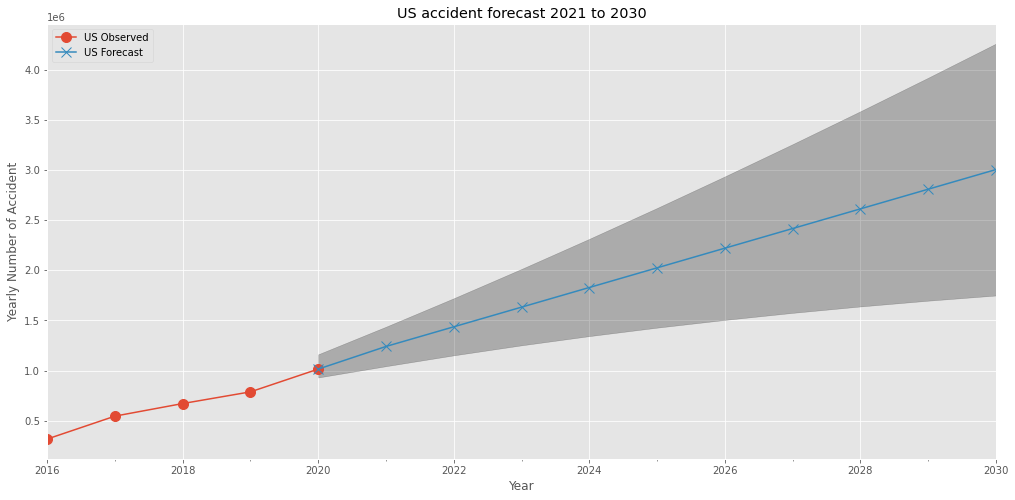

In [417]:
# Visualising the number of road accident in USA in next years
pred_uc = results_us.get_forecast(steps = 132)
pred_ci_us = pred_uc.conf_int(alpha = 0.5).resample('Y').sum()
pred_y = pd.concat([y_us[-6:], pred_uc.predicted_mean[6:]]).round() # add observed 2020 6 month to the beginning of prediction for yearly count
obse_y = pd.concat([y_us, pred_uc.predicted_mean[6:12]]).round() # add predicted 2020 6 month to the end of observed for yearly count
ax = obse_y.resample('Y').sum().plot(label = 'US Observed', figsize = (17, 8), marker='o', markersize = 10)
pred_y.resample('Y').sum().plot(ax = ax, label = 'US Forecast', marker='x', markersize = 10)
ax.fill_between(pred_ci_us.index,
                pred_ci_us.iloc[:, 0],
                pred_ci_us.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Yearly Number of Accident')
plt.title('US accident forecast 2021 to 2030')
plt.legend(loc = 2)
plt.show()

#### Forecast for all states

In [256]:
state_info = df_forecast.State.unique()
print(sorted(state_info))

['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [185]:
state_list = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA',
              'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
              'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY',
              'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
              'VT', 'WA', 'WI', 'WV', 'WY']

for item in state_list:
    
    df_temp = accident_US[accident_US['State'] == item]
    y_state = df_temp['Count'].resample('M').sum()
    row_number = np.where(y_state.index == '2020-06-30')[0].tolist()
    print('%s: '%item + '%s'%row_number)  

AL: [48]
AR: [48]
AZ: [48]
CA: [51]
CO: []
CT: [51]
DC: [48]
DE: [51]
FL: [48]
GA: [48]
IA: [51]
ID: [48]
IL: [50]
IN: [52]
KS: [48]
KY: [52]
LA: [48]
MA: [51]
MD: [51]
ME: [50]
MI: [52]
MN: [51]
MO: [51]
MS: [48]
MT: []
NC: [48]
ND: []
NE: [51]
NH: [51]
NJ: [51]
NM: []
NV: [50]
NY: [51]
OH: [52]
OK: [48]
OR: [48]
PA: [52]
RI: [51]
SC: [48]
SD: []
TN: [48]
TX: [48]
UT: []
VA: [48]
VT: [45]
WA: [48]
WI: [50]
WV: [52]
WY: []


In [316]:
accident_US.State.value_counts().sort_values(ascending = False)

CA    650415
TX    275742
FL    222472
SC    140687
NC    137023
NY    128063
IL     86061
MI     81875
PA     80408
GA     75293
VA     72860
OR     65230
MN     61626
TN     59079
WA     56593
AZ     55411
OH     54988
LA     53369
OK     52930
NJ     45580
AL     38029
MD     31470
MA     30390
MO     28955
IN     26909
CT     21350
NE     19825
KY     19418
WI     15953
CO     15823
UT     14480
RI      9748
IA      7682
NH      5874
MS      5353
DE      5059
NV      4925
KS      4718
DC      3673
NM      2969
ME      1704
WV      1596
AR      1578
ID       933
VT       438
WY       169
MT       161
SD        30
ND        25
Name: State, dtype: int64

from above, we see certain states: = ['CO', 'MT', 'ND', 'NM', 'SD', 'UT', 'WY'] are lack of data for analysis. We will leave these states at this moment.

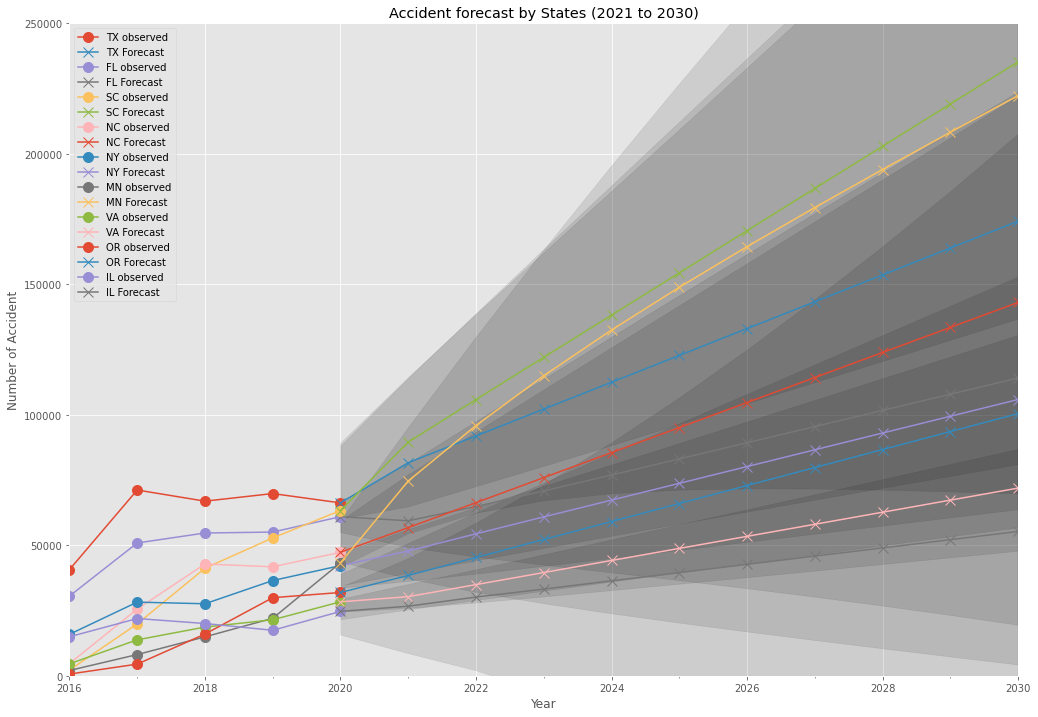

In [350]:
state_list_1 = ['TX', 'FL', 'SC', 'NC', 'NY', 'MN', 'VA', 'OR', 'IL'] 
fig, ax = plt.subplots(figsize=(17, 12))
plt.ylim(ymin = 0, ymax = 250000)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accident')
plt.title('Accident forecast by States (2021 to 2030)')

# for item in df_forecast_1.State.unique():
for item in state_list_1:
    
    results_aic = []
    df_temp = accident_US[accident_US['State'] == item]
    y_state = df_temp['Count'].resample('M').sum()
    row_number = np.where(y_state.index == '2019-12-31')
    n = int(row_number[0]) + 1

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = True,
                                                enforce_invertibility = True)
                results_ite = mod.fit()                
            except:
                continue
            res_aic = results_ite.aic
            if results_ite.aic <= res_aic:
                res_aic = results_ite.aic
                results_aic=([param, param_seasonal, results_ite.aic])

    mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                    order = results_aic[0],
                                    seasonal_order = results_aic[1],
                                    enforce_stationarity = True,
                                    enforce_invertibility = True)
    results = mod.fit()
    
    pred_uc_state = results.get_forecast(steps = 132)
    pred_ci_state = pred_uc_state.conf_int(alpha = 0.5).resample('Y').sum()
    pred_y_state = pd.concat([y_state[-6:], pred_uc_state.predicted_mean[6:]]).round()
    obse_y_state = pd.concat([y_state, pred_uc_state.predicted_mean[6:12]]).round()
    obse_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' observed', marker='o', markersize = 10)
    pred_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' Forecast', marker='x', markersize = 10)
    ax.fill_between(pred_ci_state.index,
                    pred_ci_state.iloc[:, 0],
                    pred_ci_state.iloc[:, 1], alpha=.10, color='k')
    plt.legend(loc = 2)

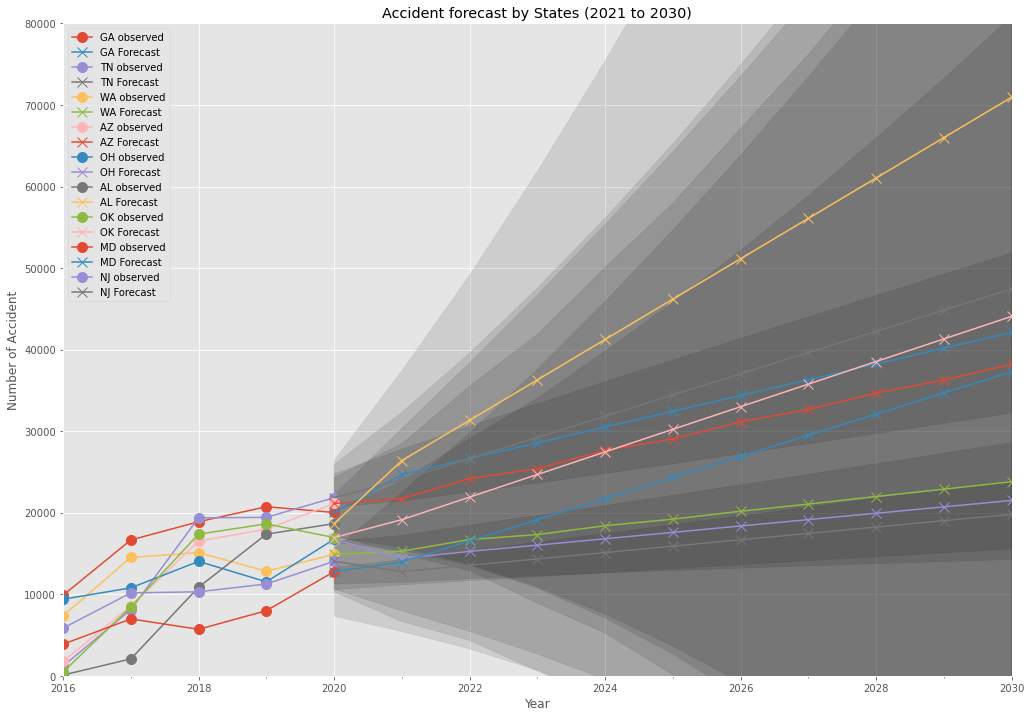

In [351]:
state_list_2 = ['GA', 'TN', 'WA', 'AZ', 'OH', 'AL', 'OK', 'MD', 'NJ']
fig, ax = plt.subplots(figsize=(17, 12))
plt.ylim(ymin = 0, ymax = 80000)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accident')
plt.title('Accident forecast by States (2021 to 2030)')

# for item in df_forecast_1.State.unique():
for item in state_list_2:
    
    results_aic = []
    df_temp = accident_US[accident_US['State'] == item]
    y_state = df_temp['Count'].resample('M').sum()
    row_number = np.where(y_state.index == '2019-12-31')
    n = int(row_number[0]) + 1

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                results_ite = mod.fit()                
            except:
                continue
            res_aic = results_ite.aic
            if results_ite.aic <= res_aic:
                res_aic = results_ite.aic
                results_aic=([param, param_seasonal, results_ite.aic])

    mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                    order = results_aic[0],
                                    seasonal_order = results_aic[1],
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
    results = mod.fit()
    
    pred_uc_state = results.get_forecast(steps = 132)
    pred_ci_state = pred_uc_state.conf_int(alpha = 0.5).resample('Y').sum()
    pred_y_state = pd.concat([y_state[-6:], pred_uc_state.predicted_mean[6:]]).round()
    obse_y_state = pd.concat([y_state, pred_uc_state.predicted_mean[6:12]]).round()
    obse_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' observed', marker='o', markersize = 10)
    pred_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' Forecast', marker='x', markersize = 10)
    ax.fill_between(pred_ci_state.index,
                    pred_ci_state.iloc[:, 0],
                    pred_ci_state.iloc[:, 1], alpha=.10, color='k')
    plt.legend(loc = 2)

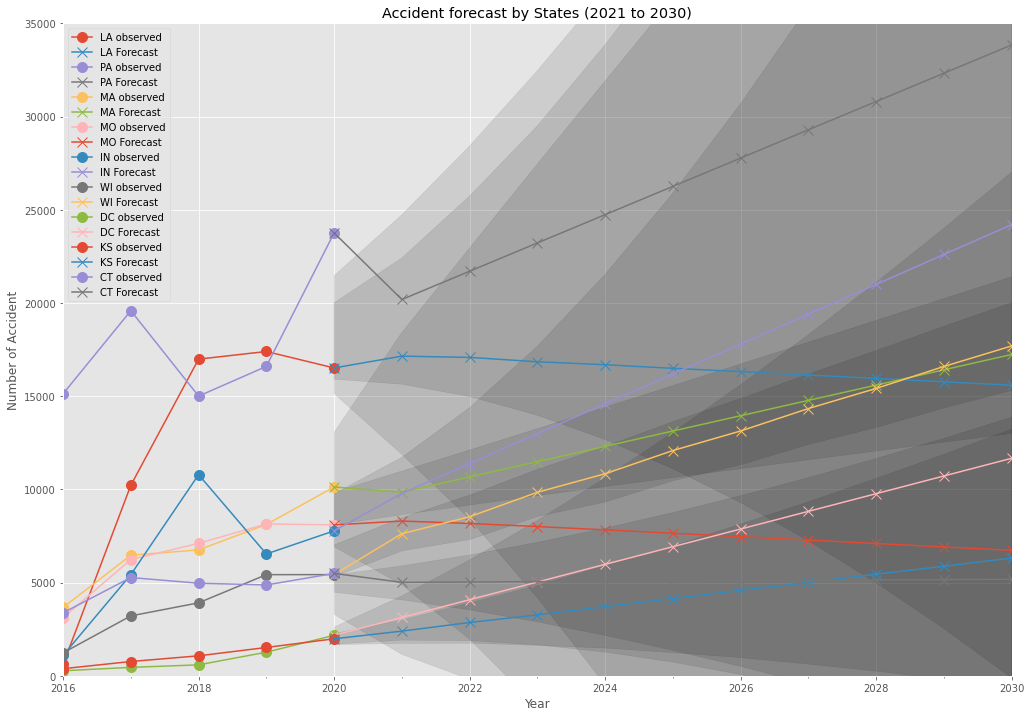

In [355]:
state_list_3 = ['LA', 'PA', 'MA', 'MO', 'IN', 'WI', 'DC', 'KS', 'CT']
fig, ax = plt.subplots(figsize=(17, 12))
plt.ylim(ymin = 0, ymax = 35000)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accident')
plt.title('Accident forecast by States (2021 to 2030)')

# for item in df_forecast_1.State.unique():
for item in state_list_3:
    
    results_aic = []
    df_temp = accident_US[accident_US['State'] == item]
    y_state = df_temp['Count'].resample('M').sum()
    row_number = np.where(y_state.index == '2019-12-31')
    n = int(row_number[0]) + 1

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                results_ite = mod.fit()                
            except:
                continue
            res_aic = results_ite.aic
            if results_ite.aic <= res_aic:
                res_aic = results_ite.aic
                results_aic=([param, param_seasonal, results_ite.aic])

    mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                    order = results_aic[0],
                                    seasonal_order = results_aic[1],
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
    results = mod.fit()
    
    pred_uc_state = results.get_forecast(steps = 132)
    pred_ci_state = pred_uc_state.conf_int(alpha = 0.5).resample('Y').sum()
    pred_y_state = pd.concat([y_state[-6:], pred_uc_state.predicted_mean[6:]]).round()
    obse_y_state = pd.concat([y_state, pred_uc_state.predicted_mean[6:12]]).round()
    obse_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' observed', marker='o', markersize = 10)
    pred_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' Forecast', marker='x', markersize = 10)
    ax.fill_between(pred_ci_state.index,
                    pred_ci_state.iloc[:, 0],
                    pred_ci_state.iloc[:, 1], alpha=.10, color='k')
    plt.legend(loc = 2)

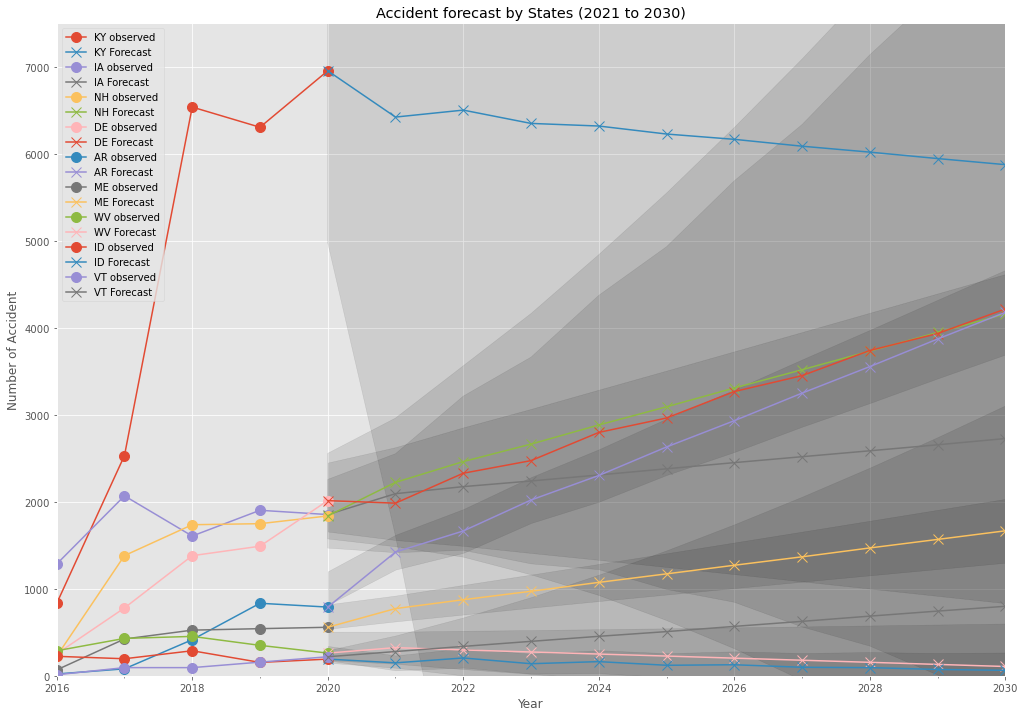

In [363]:
state_list_4 = ['KY', 'IA', 'NH', 'DE', 'AR', 'ME', 'WV', 'ID', 'VT']
fig, ax = plt.subplots(figsize=(17, 12))
plt.ylim(ymin = 0, ymax = 7500)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accident')
plt.title('Accident forecast by States (2021 to 2030)')

# for item in df_forecast_1.State.unique():
for item in state_list_4:
    
    results_aic = []
    df_temp = accident_US[accident_US['State'] == item]
    y_state = df_temp['Count'].resample('M').sum()
    row_number = np.where(y_state.index == '2019-12-31')
    n = int(row_number[0]) + 1

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                results_ite = mod.fit()                
            except:
                continue
            res_aic = results_ite.aic
            if results_ite.aic <= res_aic:
                res_aic = results_ite.aic
                results_aic=([param, param_seasonal, results_ite.aic])

    mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                    order = results_aic[0],
                                    seasonal_order = results_aic[1],
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
    results = mod.fit()
    
    pred_uc_state = results.get_forecast(steps = 132)
    pred_ci_state = pred_uc_state.conf_int(alpha = 0.5).resample('Y').sum()
    pred_y_state = pd.concat([y_state[-6:], pred_uc_state.predicted_mean[6:]]).round()
    obse_y_state = pd.concat([y_state, pred_uc_state.predicted_mean[6:12]]).round()
    obse_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' observed', marker='o', markersize = 10)
    pred_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' Forecast', marker='x', markersize = 10)
    ax.fill_between(pred_ci_state.index,
                    pred_ci_state.iloc[:, 0],
                    pred_ci_state.iloc[:, 1], alpha=.10, color='k')
    plt.legend(loc = 2)

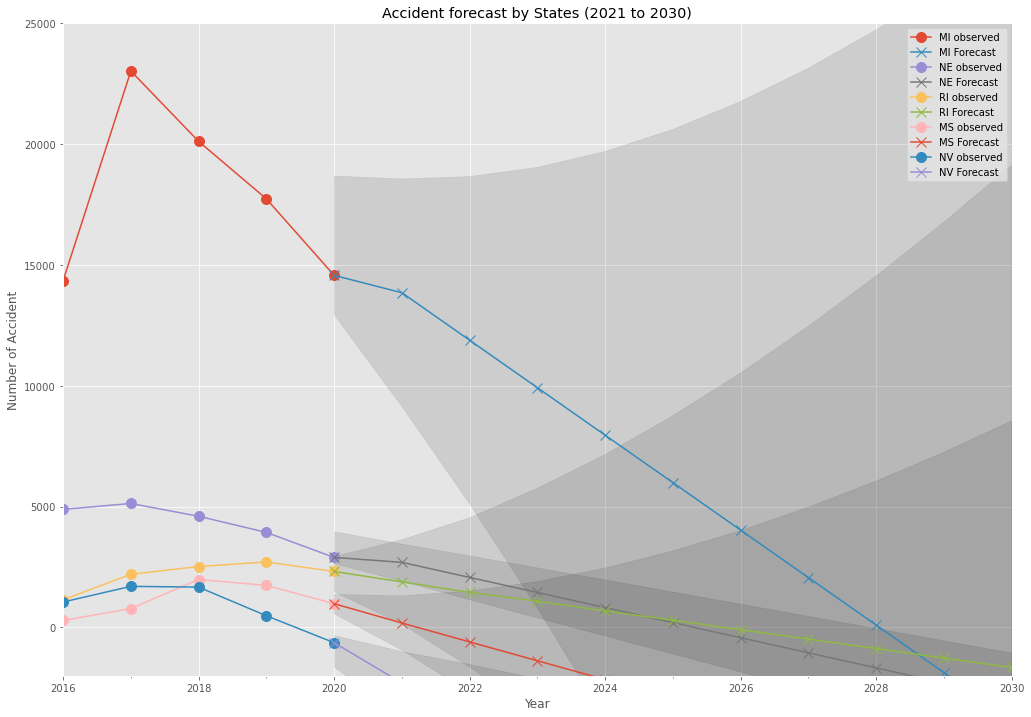

In [422]:
state_list_5 = ['MI', 'NE', 'RI', 'MS', 'NV']
fig, ax = plt.subplots(figsize=(17, 12))
plt.ylim(ymin = -2000, ymax = 25000)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accident')
plt.title('Accident forecast by States (2021 to 2030)')

# for item in df_forecast_1.State.unique():
for item in state_list_5:
    
    results_aic = []
    df_temp = accident_US[accident_US['State'] == item]
    y_state = df_temp['Count'].resample('M').sum()
    row_number = np.where(y_state.index == '2019-12-31')
    n = int(row_number[0]) + 1

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                results_ite = mod.fit()                
            except:
                continue
            res_aic = results_ite.aic
            if results_ite.aic <= res_aic:
                res_aic = results_ite.aic
                results_aic=([param, param_seasonal, results_ite.aic])

    mod = sm.tsa.statespace.SARIMAX(y_state[:n],
                                    order = results_aic[0],
                                    seasonal_order = results_aic[1],
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
    results = mod.fit()
    
    pred_uc_state = results.get_forecast(steps = 132)
    pred_ci_state = pred_uc_state.conf_int(alpha = 0.5).resample('Y').sum()
    pred_y_state = pd.concat([y_state[-6:], pred_uc_state.predicted_mean[6:]]).round()
    obse_y_state = pd.concat([y_state, pred_uc_state.predicted_mean[6:12]]).round()
    obse_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' observed', marker='o', markersize = 10)
    pred_y_state.resample('Y').sum().plot(ax = ax, label = str(item)+' Forecast', marker='x', markersize = 10)
    ax.fill_between(pred_ci_state.index,
                    pred_ci_state.iloc[:, 0],
                    pred_ci_state.iloc[:, 1], alpha=.10, color='k')
    plt.legend(loc = 1)